In [1]:
from sklearn.linear_model import Lasso,Ridge
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/home/carbon13/miniconda2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/carbon13/miniconda2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
path='/home/carbon13/machine_learning_study_follow_yincheng-master/logist'

In [3]:
data = pd.read_csv(path + '/Advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
y=data.sales

In [5]:
x=data[['TV','radio','newspaper']]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [8]:
ridge = Ridge()
lasso =Lasso()

In [12]:
alpha_scan=np.logspace(-3,2,100)
lasso_model = GridSearchCV(lasso,param_grid={'alpha':alpha_scan},cv=5)

In [13]:
lasso_model.fit(x_train,y_train)
lasso_model.best_params_

{'alpha': 2.1544346900318843}

In [14]:
lasso_model.score(x_test,y_test)

0.9199225872795948

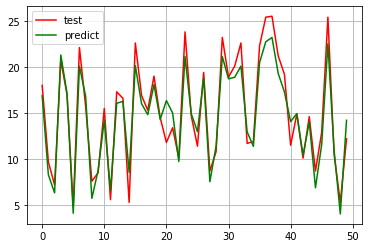

In [15]:
y_predict = lasso_model.predict(x_test)
t=np.arange(len(x_test))
t.shape
plt.plot(t,y_test,'r',label='test')
plt.plot(t,y_predict,'g',label='predict')
plt.grid()
plt.legend()
plt.show()

In [17]:
ridge_model = GridSearchCV(ridge,param_grid={'alpha':alpha_scan},cv=5)
ridge_model.fit(x_train,y_train)
ridge_model.best_params_

{'alpha': 0.001}

In [18]:
ridge_model.score(x_test,y_test)

0.9281438954617698

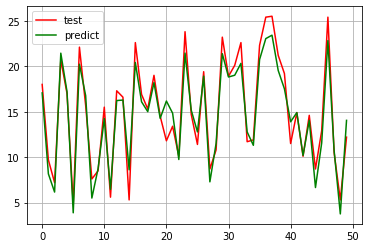

In [19]:
y_predict = ridge_model.predict(x_test)
t=np.arange(len(x_test))
t.shape
plt.plot(t,y_test,'r',label='test')
plt.plot(t,y_predict,'g',label='predict')
plt.grid()
plt.legend()
plt.show()